In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('/Users/kimginam/Downloads/Telco_Customer_Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn = df[df['Churn'] == 'Yes']
not_churn = df[df['Churn'] == 'No']

In [5]:
male = df.loc[df['gender'] == 'Male']
female = df[df['gender'] == 'Female']

In [6]:
tenure = df.sort_values(by=['tenure'])
low_tenure = tenure[:3521]
high_tenure = tenure[3522:]

In [7]:
charge = df.sort_values(by=['MonthlyCharges'])
low_charge = charge[:2347]
median_charge = charge[2347:4694]
high_charge = charge[4694:]

In [8]:
male['Churn'].value_counts()

No     2625
Yes     930
Name: Churn, dtype: int64

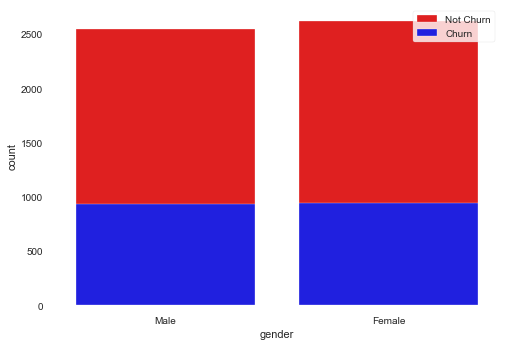

In [9]:
ax = sns.countplot(df.gender[(df["Churn"] == 'No')], color='Red')
ax = sns.countplot(df.gender[(df["Churn"] == 'Yes')], color='Blue', ax =ax)
ax.legend(["Not Churn","Churn"],loc='upper right')

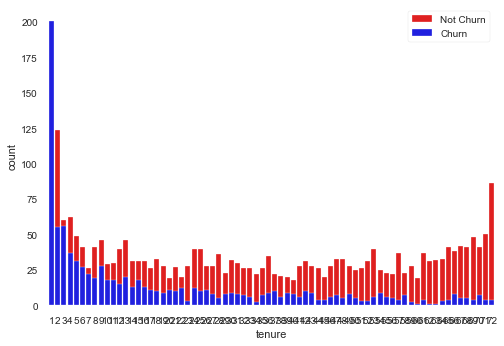

In [10]:
ax = sns.countplot(df.tenure[:3521][(df["Churn"] == 'No')], color='Red')
ax = sns.countplot(df.tenure[3522:][(df["Churn"] == 'Yes')], color='Blue', ax =ax)
ax.legend(["Not Churn","Churn"],loc='upper right')

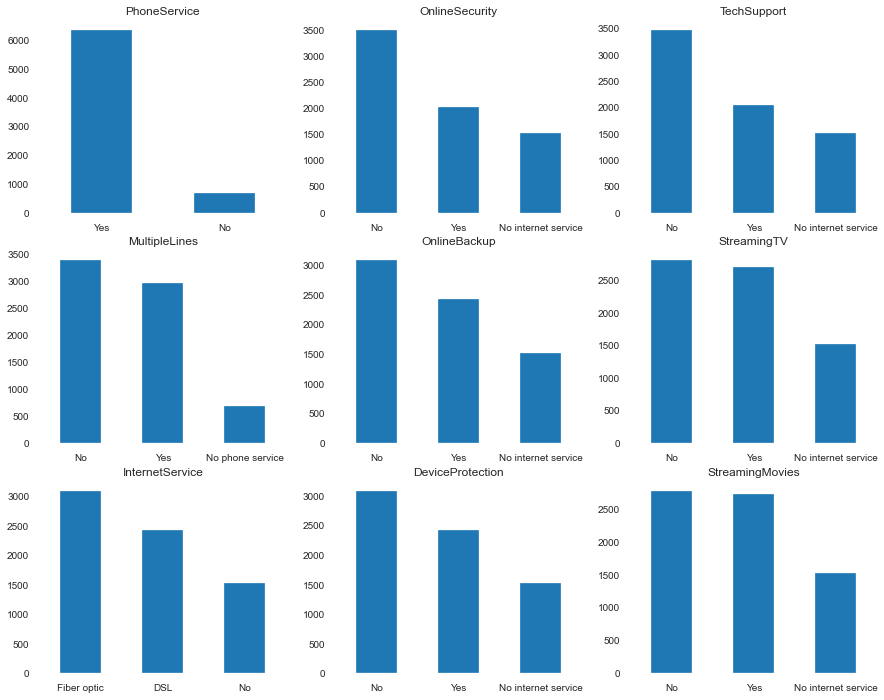

In [11]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


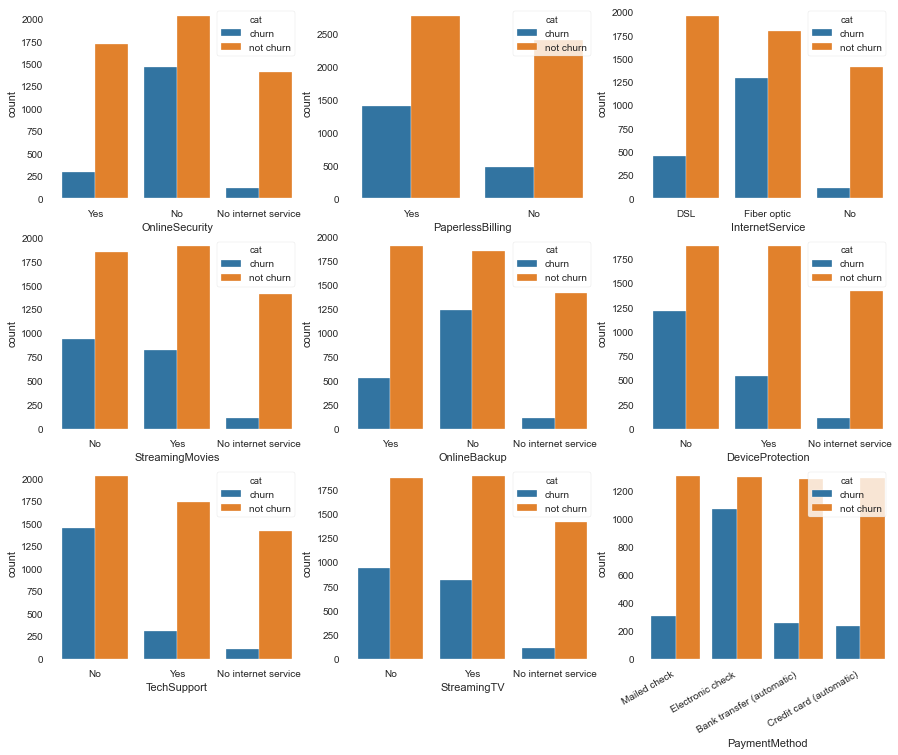

In [12]:
churn['cat'] = 'churn'
not_churn['cat'] = 'not churn'
df_combined = pd.concat([churn, not_churn])

fig, ((ax1,ax2, ax3), (ax4,ax5, ax6), (ax7,ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(15,12)
plt.xticks(rotation=30, ha='right')

sns.countplot(x="OnlineSecurity", hue='cat', data=df_combined, ax=ax1)
sns.countplot(x="PaperlessBilling", hue='cat', data=df_combined, ax=ax2)
sns.countplot(x="InternetService", hue='cat', data=df_combined, ax=ax3)
sns.countplot(x="StreamingMovies", hue='cat', data=df_combined, ax=ax4)
sns.countplot(x="OnlineBackup", hue='cat', data=df_combined, ax=ax5)
sns.countplot(x="DeviceProtection", hue='cat', data=df_combined, ax=ax6)
sns.countplot(x="TechSupport", hue='cat', data=df_combined, ax=ax7)
sns.countplot(x="StreamingTV", hue='cat', data=df_combined, ax=ax8)
sns.countplot(x="PaymentMethod", hue='cat', data=df_combined, ax=ax9)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


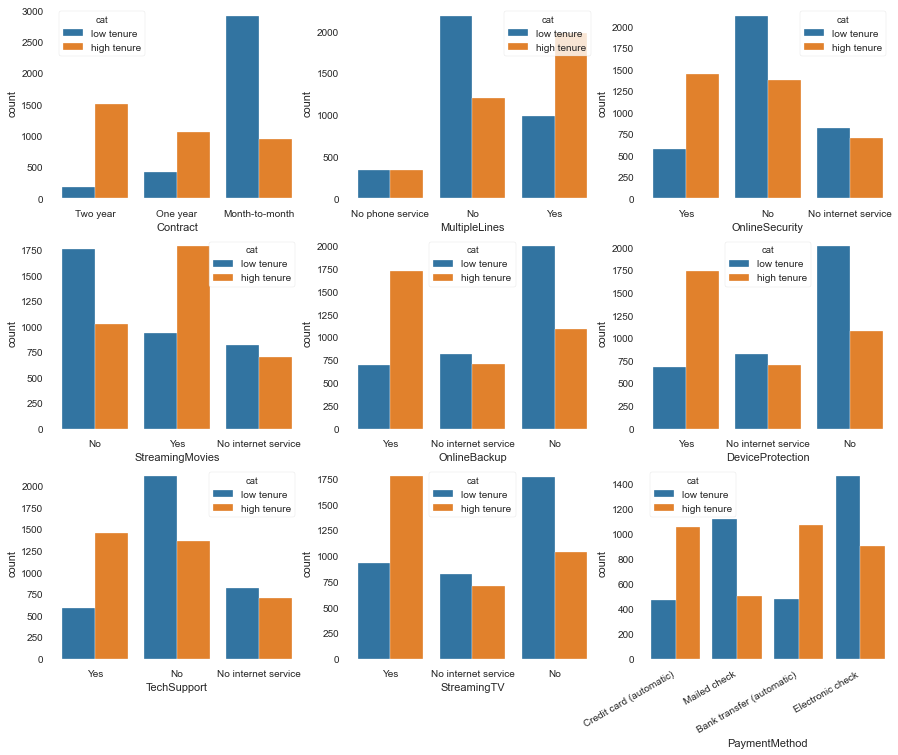

In [13]:
low_tenure['cat'] = 'low tenure'
high_tenure['cat'] = 'high tenure'

df_combined = pd.concat([low_tenure, high_tenure])

fig, ((ax1,ax2, ax3), (ax4,ax5, ax6), (ax7,ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(15,12)

sns.countplot(x="Contract", hue='cat', data=df_combined, ax=ax1)
sns.countplot(x="MultipleLines", hue='cat', data=df_combined, ax=ax2)
sns.countplot(x="OnlineSecurity", hue='cat', data=df_combined, ax=ax3)
sns.countplot(x="StreamingMovies", hue='cat', data=df_combined, ax=ax4)
sns.countplot(x="OnlineBackup", hue='cat', data=df_combined, ax=ax5)
sns.countplot(x="DeviceProtection", hue='cat', data=df_combined, ax=ax6)
sns.countplot(x="TechSupport", hue='cat', data=df_combined, ax=ax7)
sns.countplot(x="StreamingTV", hue='cat', data=df_combined, ax=ax8)
sns.countplot(x="PaymentMethod", hue='cat', data=df_combined, ax=ax9)
plt.xticks(rotation=30, ha='right')

plt.show()

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

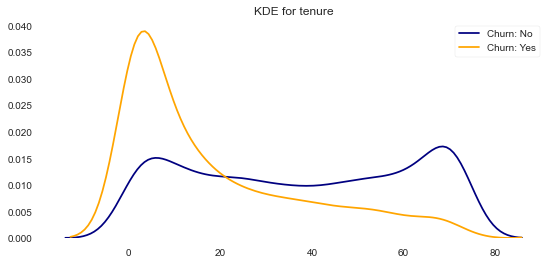

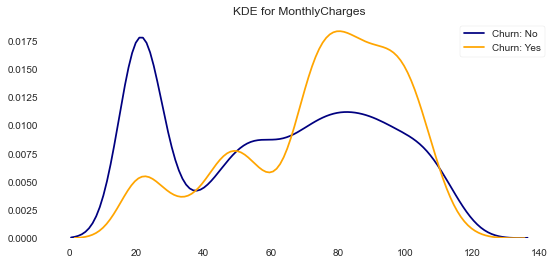

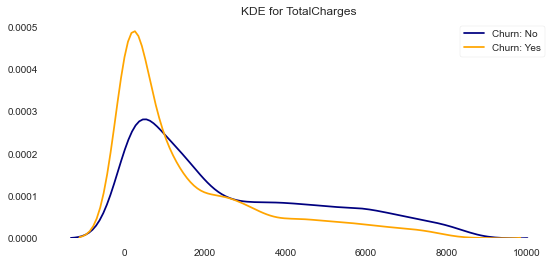

In [15]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')


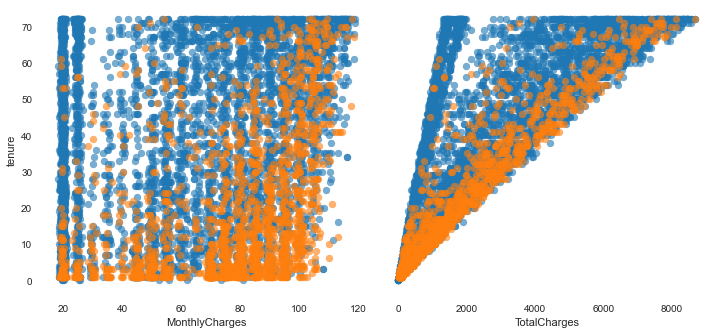

In [16]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

In [17]:
df2 = df.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df2)

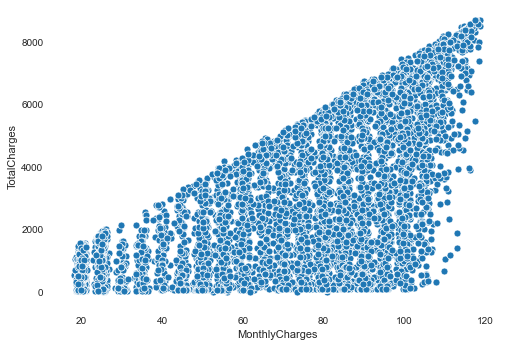

In [18]:
sns.scatterplot(x=df.MonthlyCharges, y = df.TotalCharges)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

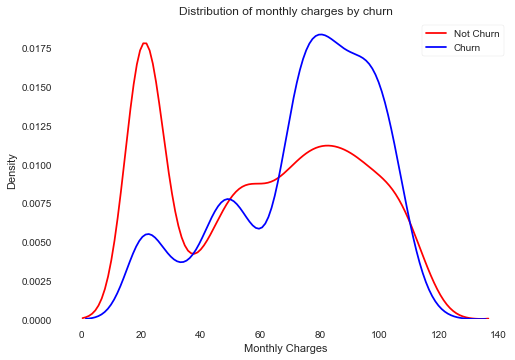

In [19]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], color="Red")
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], color="Blue")
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### Get ready to build a model

In [20]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###  LogisticRegression

In [22]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8059630856601988


###  RandomForestClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7984386089425124


### AdaBoostClassifier

In [24]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7998580553584103

### XGBClassifier

In [25]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7970191625266146